## Version Description:
 * In this version - we predict just the __MTR Hole Diameter__ (`R600_HD`)in TZ6 using [Bayesian Neural Network Ensembling](https://github.com/TeaPearce/Bayesian_NN_Ensembles/blob/master/notebook_examples/keras_regression.ipynb?fbclid=IwAR245ooffs-UvrG1mtnnK55IfN1g03A5S-jgzW6Kqlk7LJzT9nbbIS27WuU). 
 * LTR data where there are only 34 data points is used for both training (25 points) and testing (9 points) the BNN Ensemle ML model. 
 * The input features are `TZ6_Flow`,`MIXP`,`AMBP`,`AMBT` and the TZ6 CLR Restrictors.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
np.set_printoptions(precision=3, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.6g" % x)) 
from functools import reduce

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn-whitegrid')

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [5]:
input_features = ['TZ_Flow','MIXP','AMBP','AMBT','R610_HS1','R611_HS1','R612_HS1','R613_HS1']
usecols = ['HoV']+input_features+['R600_HD']

In [6]:
LTR_df = pd.read_csv('../../data/LTR_dataset.csv', usecols = usecols)[usecols]
LTR_df.head()

,HoV,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,A1,887.134249,2600.0000,101401.6000,299.386667,131,136,120,120,148
1,A2,886.764050,2600.0000,101576.3000,298.448667,131,136,120,120,149
2,A3,926.224856,2606.1928,102136.6035,297.109024,131,136,114,120,152
3,A4,915.139474,2599.8998,103195.6642,295.060027,131,136,120,120,154
4,A5,891.635528,2600.0000,102856.2000,294.755833,145,153,130,130,148


### Scaling and Normalizing the Data:

In [7]:
from sklearn.preprocessing import MinMaxScaler
## Common MinMaxScaler for both input and output variables.
# scaler = MinMaxScaler()

## Separate MinMaxScaler for both input and output variables.
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler() 

In [8]:
# Rescale Data
df_rescaled = LTR_df.copy()
df_rescaled.drop(columns=['HoV'],inplace = True) # Drop 'HoV' column as this column with categorical labels 

In [9]:
# Scale all columns with common scaler
# colnames_all = list(df_rescaled)
# df_rescaled[colnames_all] = scaler.fit_transform(df_rescaled[colnames_all])

# Scale input and output features using separate scalers
df_rescaled[input_features] = scaler_x.fit_transform(df_rescaled[input_features].astype(np.float))
df_rescaled[['R600_HD']] = scaler_y.fit_transform(df_rescaled[['R600_HD']].astype(np.float))

In [10]:
print('Rescaled Input Dataframe:')
df_rescaled

Rescaled Input Dataframe:


,TZ_Flow,MIXP,AMBP,AMBT,R610_HS1,R611_HS1,R612_HS1,R613_HS1,R600_HD
0,0.227805,0.254798,0.418091,0.949794,0.481481,0.451613,0.50,0.50,0.142857
1,0.223593,0.254798,0.474755,0.806945,0.481481,0.451613,0.50,0.50,0.214286
2,0.672487,0.394775,0.656491,0.602928,0.481481,0.451613,0.20,0.50,0.428571
3,0.546383,0.252533,1.000000,0.290882,0.481481,0.451613,0.50,0.50,0.571429
4,0.279010,0.254798,0.889894,0.244556,1.000000,1.000000,1.00,1.00,0.142857
5,0.302322,0.254798,0.393245,0.000000,0.481481,0.451613,0.50,0.50,0.142857
6,0.254987,0.254798,0.174437,0.151810,0.481481,0.451613,0.50,0.50,0.142857
7,0.695617,0.296756,0.079267,0.352644,0.481481,0.580645,0.50,0.75,0.500000
8,0.654874,0.151163,0.045465,0.684320,0.481481,0.451613,0.50,0.75,0.428571
9,0.251514,0.254798,0.769235,0.359028,0.481481,0.451613,0.50,0.50,0.285714


**Train and Test Data Split:**

In [11]:
np.random.seed(13)
sample = np.random.choice(df_rescaled.index, size=int(len(df_rescaled)*0.75), replace=False)
train_data, test_data = df_rescaled.iloc[sample], df_rescaled.drop(sample)

print("Number of training samples:", len(train_data))
print("\nNumber of testing samples:", len(test_data))

train_data_idx = train_data.index.values.tolist()
df_train = LTR_df.iloc[train_data_idx]
test_data_idx = test_data.index.values.tolist()
df_test = LTR_df.iloc[test_data_idx]

Number of training samples: 25

Number of testing samples: 9


In [12]:
# Extract pandas dataframe values to numpy array
train_array = train_data.values
test_array = test_data.values

# Separate arrays into input and output components (predictors and response variables)
x_train, y_train  = train_array[:,:-1] ,train_array[:,-1:]  
x_test, y_test = test_array[:,:-1],test_array[:,-1:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25, 8) (25, 1) (9, 8) (9, 1)


### Bayesian Ensembling

In [13]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

Using TensorFlow backend.


In [14]:
# BNN Ensemble Hyperparamters
n_ensemble = 10 # no. NNs in ensemble
reg = 'anc'   # type of regularisation to use - anc (anchoring) reg (regularised) free (unconstrained)
n_hidden = 40 # no. hidden units in NN
activation_in = 'tanh' # tanh relu sigmoid
data_noise = 0.001 # estimated noise variance
n_data = 6

# optimisation options
epochs = 200  # run reg for 15+ epochs seems to mess them up
l_rate = 0.001 # learning rate

# variance of priors
W1_var = 20/1  # 1st layer weights and biases
W_mid_var = 1/n_hidden # 2nd layer weights and biases
W_last_var = 1/n_hidden # 3rd layer weights    

In [15]:
# NN object
def fn_make_NN(reg='anc', activation_in='relu'):
    # get initialisations, and regularisation values
    W1_lambda = data_noise/W1_var
    W1_anc = np.random.normal(loc=0,scale=np.sqrt(W1_var),size=[1,n_hidden])
    W1_init = np.random.normal(loc=0,scale=np.sqrt(W1_var),size=[1,n_hidden])

    b1_var = W1_var
    b1_lambda =  data_noise/b1_var
    b1_anc = np.random.normal(loc=0,scale=np.sqrt(b1_var),size=[n_hidden])
    b1_init = np.random.normal(loc=0,scale=np.sqrt(b1_var),size=[n_hidden])

    W_mid_lambda = data_noise/W_mid_var
    W_mid_anc = np.random.normal(loc=0,scale=np.sqrt(W_mid_var),size=[n_hidden,n_hidden])
    W_mid_init = np.random.normal(loc=0,scale=np.sqrt(W_mid_var),size=[n_hidden,n_hidden])

    b_mid_var = W_mid_var
    b_mid_lambda =  data_noise/b_mid_var
    b_mid_anc = np.random.normal(loc=0,scale=np.sqrt(b_mid_var),size=[n_hidden])
    b_mid_init = np.random.normal(loc=0,scale=np.sqrt(b_mid_var),size=[n_hidden])
    
    W_last_lambda = data_noise/W_last_var
    W_last_anc = np.random.normal(loc=0,scale=np.sqrt(W_last_var),size=[n_hidden, 1])
    W_last_init = np.random.normal(loc=0,scale=np.sqrt(W_last_var),size=[n_hidden, 1])

    # create custom regularised
    def custom_reg_W1(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W1_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W1_anc)) * W1_lambda/n_data

    def custom_reg_b1(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * b1_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - b1_anc)) * b1_lambda/n_data

    def custom_reg_W_mid(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W_mid_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W_mid_anc)) * W_mid_lambda/n_data

    def custom_reg_b_mid(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * b_mid_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - b_mid_anc)) * b_mid_lambda/n_data

    def custom_reg_W_last(weight_matrix):
        if reg == 'reg':
            return K.sum(K.square(weight_matrix)) * W_last_lambda/n_data
        elif reg == 'free':
            return 0.
        elif reg == 'anc':
            return K.sum(K.square(weight_matrix - W_last_anc)) * W_last_lambda/n_data

    model = Sequential()
    model.add(Dense(n_hidden, activation=activation_in, input_shape=(len(input_features),),
                    kernel_initializer=keras.initializers.Constant(value=W1_init),
                    bias_initializer=keras.initializers.Constant(value=b1_init),
                    kernel_regularizer=custom_reg_W1,
                    bias_regularizer=custom_reg_b1))

    model.add(Dense(n_hidden, activation=activation_in, 
                    kernel_initializer=keras.initializers.Constant(value=W_mid_init),
                    bias_initializer=keras.initializers.Constant(value=b_mid_init),
                    kernel_regularizer=custom_reg_W_mid,
                    bias_regularizer=custom_reg_b_mid))

    model.add(Dense(1, activation='linear',use_bias=False,
                    kernel_initializer=keras.initializers.Constant(value=W_last_init),
                    kernel_regularizer=custom_reg_W_last))

    model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(lr=l_rate))
    return model


def fn_predict_ensemble(NNs, x_test):
    ''' fn to predict given a list of NNs (an ensemble)''' 
    y_preds = []
    for m in range(len(NNs)):
        y_preds.append(NNs[m].predict(x_test, verbose=0))
    y_preds = np.array(y_preds)
#     y_preds_mu = np.mean(y_preds,axis=0)
#     y_preds_std = np.std(y_preds,axis=0)
#     return y_preds, y_preds_mu, y_preds_std
    return y_preds

In [16]:
# create the NNs
NNs=[]
for m in range(n_ensemble):
    NNs.append(fn_make_NN(reg=reg, activation_in=activation_in))
print(NNs[-1].summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_29 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 40        
Total params: 2,040
Trainable params: 2,040
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
%%time
# do training
NNs_hist_train=[];
for m in range(n_ensemble):
    print('-- training: ' + str(m+1) + ' of ' + str(n_ensemble) + ' NNs --')
    hist = NNs[m].fit(x_train, y_train,batch_size=n_data,epochs=epochs,verbose=0)
    NNs_hist_train.append(hist.history['loss'])

-- training: 1 of 10 NNs --
-- training: 2 of 10 NNs --
-- training: 3 of 10 NNs --
-- training: 4 of 10 NNs --
-- training: 5 of 10 NNs --
-- training: 6 of 10 NNs --
-- training: 7 of 10 NNs --
-- training: 8 of 10 NNs --
-- training: 9 of 10 NNs --
-- training: 10 of 10 NNs --


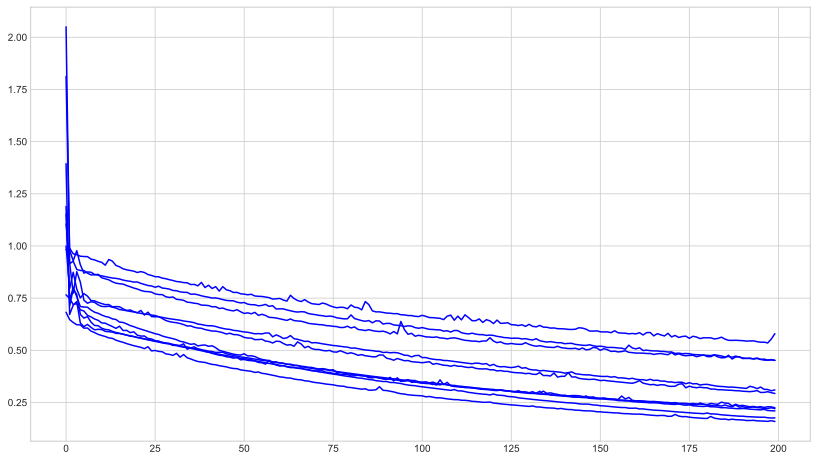

In [18]:
# check how training looked
NNs_hist_train=np.array(NNs_hist_train)
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
for m in range(n_ensemble):
    ax.plot(NNs_hist_train[m], color='b',label='train')

In [19]:
def output_reversescaler(predictions_scaled):
    '''Custom Function to Inverse Scale Predictions from BNN'''
    predictions = []
    for i in range(len(predictions_scaled)):
        data_scaled = predictions_scaled[i]
        data_unscaled = scaler_y.inverse_transform(data_scaled).ravel()
#         data_unscaled = np.concatenate(scaler_y.inverse_transform(data_scaled)).ravel().tolist()
        predictions.append(data_unscaled)
    return np.asarray(predictions)

In [20]:
# Make Predictions
y_preds_scaled = fn_predict_ensemble(NNs,x_test)
y_preds = output_reversescaler(y_preds_scaled)

In [21]:
print('Length of Y_Predictions:',len(y_preds))
print('Y_Predictions:')
y_preds

Length of Y_Predictions: 10
Y_Predictions:


array([[151.62, 148.618, 146.283, 148.529, 148.517, 148.514, 148.515, 148.655, 149.994],
       [152.743, 149.167, 147.718, 148.646, 148.545, 148.53, 148.533, 149.335, 146.418],
       [152.635, 148.081, 146.019, 147.492, 147.384, 146.973, 146.099, 147.991, 141.968],
       [149.885, 149.885, 149.885, 149.885, 149.885, 149.885, 149.885, 149.885, 149.885],
       [149.532, 148.746, 149.828, 148.704, 148.692, 148.689, 148.689, 148.869, 151.529],
       [152.179, 152.179, 152.179, 152.179, 152.179, 152.179, 152.179, 152.179, 152.18],
       [151.889, 150.025, 147.845, 149.584, 149.729, 146.956, 148.371, 148.841, 146.697],
       [151.011, 151.011, 151.011, 151.011, 151.011, 151.011, 151.011, 151.011, 150.878],
       [152.179, 149.954, 147.334, 149.151, 148.848, 148.138, 148.154, 149.059, 147.028],
       [149.424, 148.345, 149.004, 148.314, 148.308, 148.307, 148.307, 148.421, 156.422]], dtype=float32)

In [22]:
# Manual Check of means of a random Column of y_preds array
x = []
for i in range(len(y_preds)):
    element = y_preds[i][0] # first index specifies array number, seconds index specifies the index of element inside the array
    x.append(element)
print('First Column elements:',x)
print('Mean:',np.mean(x))

First Column elements: [151.61992, 152.74332, 152.63544, 149.8849, 149.53203, 152.17892, 151.88892, 151.01093, 152.17946, 149.424]
Mean: 151.30978


In [23]:
y_true = df_test['R600_HD'].values
HoV_test_data = df_test['HoV'].values

y_mins = np.amin(y_preds,axis = 0) # axis = 0 computes measures across columns 
y_maxes = np.amax(y_preds, axis = 0 )
y_mu = np.mean(y_preds,axis = 0)
y_std = np.std(y_preds,axis = 0)

In [24]:
print('Length of Y_Predictions_Mu',len(y_mu))
print('No. of Test HoVs:',len(HoV_test_data),'\nHoVs of Test Points:',HoV_test_data)
print('Test Points-Org Y:', y_true)
print('Y_Predictions_Min:', y_mins)
print('Y_Predictions_Max:', y_maxes)
print('Y_Predictions_Mu:', y_mu)
print('Y_Predictions_Std:', y_std)

Length of Y_Predictions_Mu 9
No. of Test HoVs: 9 
HoVs of Test Points: ['A3' 'A4' 'C1' 'C5' 'D1' 'F1' 'F3' 'I1' 'Q1']
Test Points-Org Y: [152 154 148 152 151 146 148 152 148]
Y_Predictions_Min: [149.424 148.081 146.019 147.492 147.384 146.956 146.099 147.991 141.968]
Y_Predictions_Max: [152.743 152.179 152.179 152.179 152.179 152.179 152.179 152.179 156.422]
Y_Predictions_Mu: [151.31 149.601 148.711 149.35 149.31 148.918 148.974 149.425 149.3]
Y_Predictions_Std: [1.20797 1.21621 1.91849 1.31359 1.34729 1.57892 1.59636 1.2149 3.75897]


### Plot BNN Predictions with Mean and Error Bars

In [25]:
from bokeh.models import HoverTool,ColumnDataSource,Label,Range1d
from bokeh.plotting import figure, show, output_file,output_notebook
from bokeh.models.markers import CircleX
output_notebook()

Loading BokehJS ...

In [26]:
# create the coordinates for the errorbars
y_xs = []
ys_std = []
y_ys = []

for x, y_mean,std,min_dia, max_dia in zip(HoV_test_data,y_mu,y_std,y_mins,y_maxes):
    y_xs.append((x, x))
    ys_std.append((y_mean - std, y_mean + std))
    y_ys.append((y_mean - (y_mean - min_dia), y_mean + (max_dia - y_mean)))

In [27]:
# plot the points
f = figure(x_range=HoV_test_data, title='Bayesian Ensembling - Dia Predictions with Confidence Interval', width=1200)
dot_hover_tooltips = HoverTool(names=['DiaPoints'],tooltips=[("HoV","@x"),("Dia", "@y mm")])
whisker_hover_tooltips = HoverTool(names=['Whiskers'],tooltips=[("Dia", "@y mm")])
multiline_hover_tooltips = HoverTool(names=['LinePlot'],tooltips=[("Dia", "$y mm")])

f.add_tools(dot_hover_tooltips,whisker_hover_tooltips,multiline_hover_tooltips)

f.xaxis.axis_label = 'Head of Versions'
f.yaxis.axis_label = 'Diameter Predictions (mm)'

f.multi_line(y_xs, ys_std, color='blue', line_width = 3, legend = 'Mean Prediction +/- Std.Dev')
f.multi_line(y_xs, y_ys, color='deepskyblue',name='LinePlot',legend = 'Mean Prediction +/- Min & Max Value')
f.diamond(HoV_test_data, y_true, color='red', size=12, line_alpha=0,name='DiaPoints', legend = 'True Dia')
f.circle(HoV_test_data, y_mu, color='blue', size=9, line_alpha=0,name='DiaPoints', legend = 'Predicted Dia (Mean)')

# whiskers (almost-0 height rects simpler than segments)
for i in range(len(y_xs)):
    f.rect(y_xs[i], y_ys[i], 0.2, 0.001, line_color="deepskyblue",name='Whiskers')

f.y_range=Range1d(135, 165)
f.legend.location = "top_center"
f.legend.click_policy="hide"

output_file('plots/BNN_Ensembling_v2_LTR_LTR_Predictions.html', mode='inline')

In [28]:
show(f)